In [1]:
import pandas as pd
import numpy as np
from datetime import date
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
ACR_issue= pd.read_excel(r"C:\Users\naren\Downloads\Voluntary-Registry-Offsets-Database--v7-1--2022-year-end-release.xlsx", sheet_name = "ACR Issuances")
print(ACR_issue.columns)
print(ACR_issue['Methodology /Protocol Version'].unique())

Index([                   'Date Issued',                     'Project ID',
                         'Project Name',              'Project Developer',
                         'Project Type',               'Protocol Version',
                         'ARB Eligible',               'CORSIA Qualified',
                              'Vintage',                'Issuance \nYear',
                 'Total Credits Issued',      'Credits Issued to Project',
        'Credits Issued to Buffer Pool',          'Project Site Location',
                   'Project Site State',           'Project Site Country',
        'Methodology /Protocol Version',               'Verified Removal',
       'Additional Certifications/SDGs',                       'Verifier',
                      'Project Website',              'ACR Issuance Data',
                       'Updated 1-2-23',         'Total Credits Issued: ',
                              208851584],
      dtype='object')
['Emission reductions through indust

In [3]:
CDR = ['AR-ACM0001 Afforestation and Reforestation of Degraded Land','Afforestation and Reforestation of Degraded Lands','Restoration of California Deltaic and Coastal Wetlands']
CDR= '|'.join(CDR)
ACR_issue_CDR = ACR_issue[ACR_issue['Methodology /Protocol Version'].str.contains(CDR)]
ACR_CDR_credits = ACR_issue_CDR['Credits Issued to Project'].sum()
print("Carbon Dioxide Removal project credits in the ACR: " + str(ACR_CDR_credits))
ACR_credits = ACR_issue['Credits Issued to Project'].dropna().sum()
print("Credits in the ACR: "+str(ACR_credits))
ACR_CDR_ratio = ACR_CDR_credits/ACR_credits
print("Percent of ACR credits from CDR projects: "+ str(ACR_CDR_ratio))

Carbon Dioxide Removal project credits in the ACR: 8906319
Credits in the ACR: 208851584
Percent of ACR credits from CDR projects: 0.04264424922915595


In [4]:
ACR_ARB= ACR_issue[ACR_issue['ARB Eligible']=='Yes']
ACR_ARB_CDR = ACR_ARB[ACR_ARB['Methodology /Protocol Version'].str.contains(CDR)]
print(ACR_ARB_CDR)

Empty DataFrame
Columns: [Date Issued, Project ID, Project Name, Project Developer, Project Type, Protocol Version, ARB Eligible, CORSIA Qualified, Vintage, Issuance 
Year, Total Credits Issued, Credits Issued to Project, Credits Issued to Buffer Pool, Project Site Location, Project Site State, Project Site Country, Methodology /Protocol Version, Verified Removal, Additional Certifications/SDGs, Verifier, Project Website, ACR Issuance Data, Updated 1-2-23, Total Credits Issued: , 208851584]
Index: []

[0 rows x 25 columns]


In [5]:
CAR_issue= pd.read_excel(r"C:\Users\naren\Downloads\Voluntary-Registry-Offsets-Database--v7-1--2022-year-end-release.xlsx", sheet_name = "CAR Issuances")
print(CAR_issue.columns)
print(CAR_issue['Project Type'].unique())

Index([                                  'Date \nIssued',
                                            'Project ID',
                              'Cooperative/Aggregate ID',
                                        'Project \nName',
                                     'Project Developer',
                                         'Project Owner',
                                          'Project Type',
                                      'Protocol Version',
                                          'ARB Eligible',
                                       'CORSIA Eligible',
                                               'Vintage',
                                       'Issuance \nYear',
                           'Total Offset Credits Issued',
       'Offset Credits Currently in Reserve Buffer Pool',
           'Offset Credits Intended for ARB Buffer Pool',
                      'Offset Credits Converted to VCUs',
                           'Canceled for ARB Compliance',
              

In [6]:
Gold_issue= pd.read_excel(r"C:\Users\naren\Downloads\Voluntary-Registry-Offsets-Database--v7-1--2022-year-end-release.xlsx", sheet_name = "Gold Issuances")
print(Gold_issue.columns)
print(Gold_issue['Project Type'].unique())
print(Gold_issue['Methodology'].unique())

Index([             'Project ID',                    'GSID',
                       'Vintage',         'Issuance \nYear',
                 'Credit Status',                'Quantity',
                  'Project Name',       'Project Developer',
                  'Project Type',            'Product Type',
                       'Country',             'Methodology',
       'Programme of Activities',                'POA GSID',
                 'Issuance Date', 'Monitoring Period Start',
         'Monitoring Period End',           'Serial Number',
          'Eligible for CORSIA?',                   'Notes',
           ' GOLD Issuance Data',          'Updated 1-2-23',
         'Total Credits Issued:',                 242224223],
      dtype='object')
['Wind' 'Small, Low - Impact Hydro' 'Energy Efficiency - Domestic'
 'Biogas - Heat' 'Other' 'Energy Efficiency - Industrial'
 'Biomass, or Liquid Biofuel - Heat' 'Solar Thermal - Electricity'
 'Biogas - Electricity' 'Biogas - Cogeneration' 'Geot

In [7]:
Gold_CDR = Gold_issue[Gold_issue['Methodology'].str.contains('Afforestation/Reforestation GHG Emissions Reduction & Sequestration Methodology')>0]
Gold_CDR_credits = Gold_CDR['Quantity'].sum()
print("Carbon Dioxide Removal project credits registered under the Gold Standard: " + str(Gold_CDR_credits))
Gold_credits = Gold_issue[Gold_issue['Quantity']!='*500*']['Quantity'].sum()
print("Credits issued under the Gold Standard: "+str(Gold_credits))
Gold_CDR_ratio=Gold_CDR_credits/Gold_credits
print("Percent of Gold Standard credits from CDR projects: "+ str(Gold_CDR_ratio))

Carbon Dioxide Removal project credits registered under the Gold Standard: 8986515
Credits issued under the Gold Standard: 242224223
Percent of Gold Standard credits from CDR projects: 0.03709998483512526


In [8]:
from datetime import date
ACR_issue['Date Issued']= pd.to_datetime(ACR_issue['Date Issued'])
ACR_issue_ARB=ACR_issue[ACR_issue['Date Issued']>='1/1/2014']
ACR_issue_ARB.reset_index(inplace = True, drop = True)
ACR_issue_ARB['Date Ordinal'] =ACR_issue_ARB['Date Issued'].apply(lambda date: date.toordinal())

C:\Users\naren\AppData\Local\Temp\ipykernel_18616\1672677292.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ACR_issue_ARB['Date Ordinal'] =ACR_issue_ARB['Date Issued'].apply(lambda date: date.toordinal())


In [9]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
ACR_issue_ARB['ARB'] = ""
for i in range(len(ACR_issue_ARB)):
 if ACR_issue_ARB['ARB Eligible'][i]=='Yes':
  ACR_issue_ARB['ARB'][i]=1
 else:
  ACR_issue_ARB['ARB'][i]=0

ACR_issue_ARB['ARB'].mean()

C:\Users\naren\AppData\Local\Temp\ipykernel_18616\1653713897.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ACR_issue_ARB['ARB'] = ""
C:\Users\naren\AppData\Local\Temp\ipykernel_18616\1653713897.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ACR_issue_ARB['ARB'][i]=0
C:\Users\naren\AppData\Local\Temp\ipykernel_18616\1653713897.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

0.47696476964769646

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ACR_issue_ARB[['Date Ordinal']])
ACR_issue_ARB['Scaled Date Ordinal']=scaler.transform(ACR_issue_ARB[['Date Ordinal']])

C:\Users\naren\AppData\Local\Temp\ipykernel_18616\3959054392.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ACR_issue_ARB['Scaled Date Ordinal']=scaler.transform(ACR_issue_ARB[['Date Ordinal']])


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ACR_issue_ARB['Scaled Date Ordinal'], ACR_issue_ARB['ARB'], test_size=0.25, random_state = 51)
lg = LogisticRegression()
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = y_train.astype('int')
y_test = y_test.astype('int')
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
print("Accuracy score: " + str(accuracy_score(y_test,y_pred)))
print("Coefficient: " + str(lg.coef_))
print(confusion_matrix(y_test, y_pred))

Accuracy score: 0.5487364620938628
Coefficient: [[-0.00392223]]
[[152   0]
 [125   0]]


In [12]:
sample_weight = np.ones(len(ACR_issue_ARB))
for i in range(len(sample_weight)):
 sample_weight[i] = sample_weight[i]*list(ACR_issue_ARB['Credits Issued to Project'])[i]

X_train, X_test, weight_train, weight_test, y_train, y_test = train_test_split(ACR_issue_ARB['Scaled Date Ordinal'], sample_weight, ACR_issue_ARB['ARB'], test_size=0.25, random_state = 51)
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = y_train.astype('int')
y_test = y_test.astype('int')
lg.fit(X_train,y_train, weight_train)
y_pred = lg.predict(X_test)
print("Accuracy score: " + str(accuracy_score(y_test,y_pred)))
print("Coefficient: " + str(lg.coef_))
print(confusion_matrix(y_test, y_pred))

Accuracy score: 0.5595667870036101
Coefficient: [[-1.35839837]]
[[56 96]
 [26 99]]


In [13]:
ACR_retire = pd.read_excel(r"C:\Users\naren\Downloads\Voluntary-Registry-Offsets-Database--v7-1--2022-year-end-release.xlsx", sheet_name = "ACR Retirements")
ACR_retire=ACR_retire[ACR_retire['Retirement Year']>=2014]
ACR_retire.reset_index(inplace = True, drop = True)
ACR_retire['Retirement Delay'] = ""
for i in range(len(ACR_retire)):
 ACR_retire['Retirement Delay'][i] = ACR_retire['Retirement Year'][i]-ACR_retire['Vintage'][i]

C:\Users\naren\AppData\Local\Temp\ipykernel_18616\1035019872.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ACR_retire['Retirement Delay'][i] = ACR_retire['Retirement Year'][i]-ACR_retire['Vintage'][i]


In [14]:
scaler.fit(ACR_retire[['Retirement Year']])
ACR_retire['Scaled Retirement Year']=scaler.transform(ACR_retire[['Retirement Year']])
from sklearn.linear_model import LinearRegression
ln = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(ACR_retire['Scaled Retirement Year'], ACR_retire['Retirement Delay'], test_size=0.25, random_state = 51)
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = y_train.astype('int')
y_test = y_test.astype('int')
ln1 = ln.fit(X_train,y_train)
print(ln1.score(X_train,y_train))

0.030466717903815055


0.1071752518396627
[1.77274046]


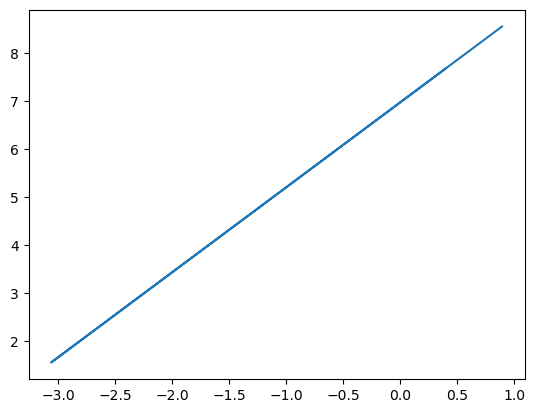

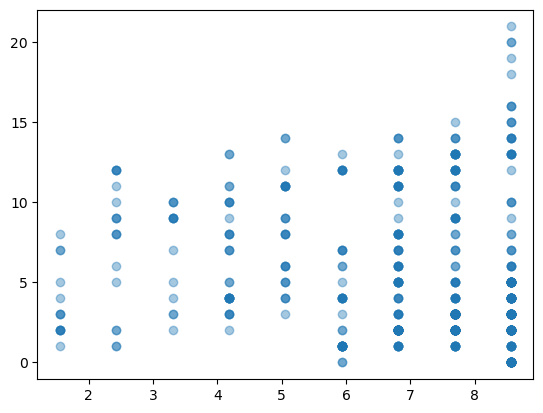

In [15]:
sample_weight = np.ones(len(ACR_retire))
for i in range(len(sample_weight)):
 sample_weight[i] = sample_weight[i]*list(ACR_retire['Quantity of Offset Credits'])[i]

X_train, X_test, y_train, y_test, weight_train, weight_test = train_test_split(ACR_retire['Scaled Retirement Year'], ACR_retire['Retirement Delay'], sample_weight, test_size=0.25, random_state = 51)
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = y_train.astype('int')
y_test = y_test.astype('int')
ln1 = ln.fit(X_train,y_train, weight_train)
print(ln1.score(X_train,y_train, weight_train))
print(ln1.coef_)
y_pred = ln1.predict(X_test)
plt.plot(X_test,y_pred)
plt.show()
plt.clf()
plt.scatter(y_pred,y_test, alpha=0.4)
plt.show()

In [16]:
carbon_index = pd.read_excel(r"C:\Users\naren\Downloads\IHS Markit Global Carbon Index_custom_Total Return Index Level.xlsx")
carbon_index.drop(np.array([0,1,2,3,4,5]),axis=0,inplace=True)
carbon_index.reset_index(inplace=True, drop = True)
carbon_index.rename(columns={'Unnamed: 0':'Date','Unnamed: 3':'Index Level'}, inplace= True)
carbon_index['Date']=pd.to_datetime(carbon_index['Date'])
carbon_index['Date']=carbon_index['Date'].apply(lambda x: x.strftime('%Y-%m'))

C:\Users\naren\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [17]:
ACR_retire['Index Level'] = ""

for i in range(len(ACR_retire)):
	if ACR_retire['Retirement Year'][i]==2014:
		ACR_retire['Index Level'][i]= np.array([float(i) for i in carbon_index.loc[(carbon_index['Date']<='2014-12') & (carbon_index['Date']>='2014-01')]['Index Level']]).mean()
	elif ACR_retire['Retirement Year'][i]==2015:
		ACR_retire['Index Level'][i]= np.array([float(i) for i in carbon_index.loc[(carbon_index['Date']<='2015-12') & (carbon_index['Date']>='2015-01')]['Index Level']]).mean()
	elif ACR_retire['Retirement Year'][i]==2016:
		ACR_retire['Index Level'][i]= np.array([float(i) for i in carbon_index.loc[(carbon_index['Date']<='2016-12') & (carbon_index['Date']>='2016-01')]['Index Level']]).mean()
	elif ACR_retire['Retirement Year'][i]==2017:
		ACR_retire['Index Level'][i]= np.array([float(i) for i in carbon_index.loc[(carbon_index['Date']<='2017-12') & (carbon_index['Date']>='2017-01')]['Index Level']]).mean()
	elif ACR_retire['Retirement Year'][i]==2018:
		ACR_retire['Index Level'][i]= np.array([float(i) for i in carbon_index.loc[(carbon_index['Date']<='2018-12') & (carbon_index['Date']>='2018-01')]['Index Level']]).mean()
	elif ACR_retire['Retirement Year'][i]==2019:
		ACR_retire['Index Level'][i]= np.array([float(i) for i in carbon_index.loc[(carbon_index['Date']<='2019-12') & (carbon_index['Date']>='2019-01')]['Index Level']]).mean()
	elif ACR_retire['Retirement Year'][i]==2020:
		ACR_retire['Index Level'][i]= np.array([float(i) for i in carbon_index.loc[(carbon_index['Date']<='2020-12') & (carbon_index['Date']>='2020-01')]['Index Level']]).mean()
	elif ACR_retire['Retirement Year'][i]==2021:
		ACR_retire['Index Level'][i]= np.array([float(i) for i in carbon_index.loc[(carbon_index['Date']<='2021-12') & (carbon_index['Date']>='2021-01')]['Index Level']]).mean()
	elif ACR_retire['Retirement Year'][i]==2022:
		ACR_retire['Index Level'][i]= np.array([float(i) for i in carbon_index.loc[(carbon_index['Date']<='2022-12') & (carbon_index['Date']>='2022-01')]['Index Level']]).mean()

C:\Users\naren\AppData\Local\Temp\ipykernel_18616\2898706107.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ACR_retire['Index Level'][i]= np.array([float(i) for i in carbon_index.loc[(carbon_index['Date']<='2014-12') & (carbon_index['Date']>='2014-01')]['Index Level']]).mean()
C:\Users\naren\AppData\Local\Temp\ipykernel_18616\2898706107.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ACR_retire['Index Level'][i]= np.array([float(i) for i in carbon_index.loc[(carbon_index['Date']<='2015-12') & (carbon_index['Date']>='2015-01')]['Index Level']]).mean()
C:\Users\naren\AppData\Local\Temp\ipykernel_18616\2898706107

In [18]:
x = ACR_retire[['Retirement Year','Index Level']]
y = ACR_retire['Retirement Delay']
X_train, X_test, y_train, y_test, weight_train, weight_test = train_test_split(x, y, sample_weight, test_size=0.25, random_state = 51)
ln1 = ln.fit(X_train,y_train, weight_train)
print(ln1.score(X_train,y_train, weight_train))
print(ln1.coef_)

0.20124485003495163
[-0.97219821  0.01984099]


In [19]:
x = ACR_retire[['Index Level']]
X_train, X_test, y_train, y_test, weight_train, weight_test = train_test_split(x, y, sample_weight, test_size=0.25, random_state = 51)
ln1 = ln.fit(X_train,y_train, weight_train)
print(ln1.score(X_train,y_train, weight_train))
print(ln1.coef_)

0.17950300270345865
[0.0111232]
